In [95]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [141]:
header=["time", "x", "y", "z"]

sensor = "linear"
not_pinched = pd.read_csv(f'data\\not_pinched\\sample_{sensor}.csv', names=header)
pinched = pd.read_csv(f'data\\pinched\\sample_{sensor}.csv', names=header)
to_pinched = pd.read_csv(f'data\\to_pinch\\sample_{sensor}.csv', names=header)

not_pinched

,time,x,y,z
0,70,0.035913,-0.021548,0.000000
1,70,-0.363919,-0.035913,-0.316035
2,70,0.263362,0.344765,-0.296881
3,70,0.217872,0.189142,-0.189142
4,70,-0.083797,-0.201113,-0.129287
...,...,...,...,...
294,2967,0.086191,0.021548,-0.055067
295,2978,0.069432,0.007183,-0.117316
296,2985,0.002394,0.014365,-0.093374
297,2995,0.026336,0.033519,-0.134075


In [142]:
# what is a better name for this function?

def preprocess_data(data):
    # copy dataframe
    p_data = data.copy()
    p_data["time"] = p_data["time"] // 10
    p_data = p_data.groupby("time").agg(["mean"])
    p_data.columns = p_data.columns.droplevel(0)
    p_data.columns = ["x", "y", "z"]
    p_not_pinched

    # insert rows that are not existing in the dataframe
    p_data = p_data.reindex(range(0, p_data.index.max() + 1), fill_value=np.nan)

    # set x, y, x of time 0 to 0
    p_data.loc[0, "x"] = data.loc[0, "x"]
    p_data.loc[0, "y"] = data.loc[0, "y"]
    p_data.loc[0, "z"] = data.loc[0, "z"]

    # interpolate missing values
    p_data = p_data.interpolate(method='linear', limit_direction='forward')

    return p_data

<Axes: xlabel='time'>

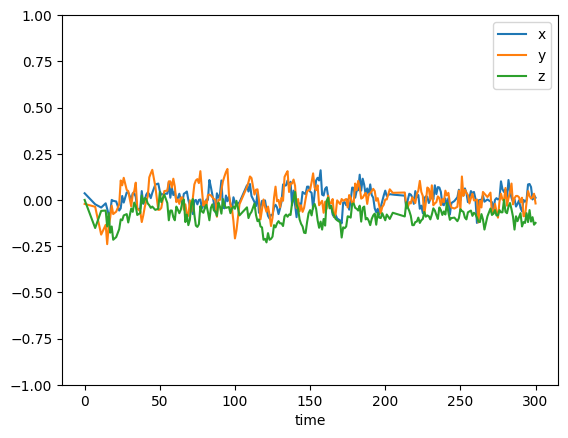

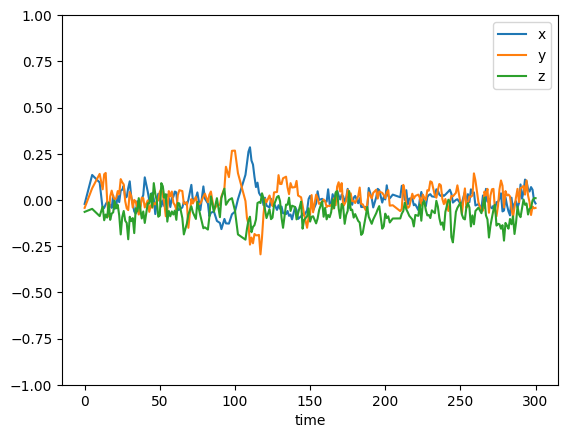

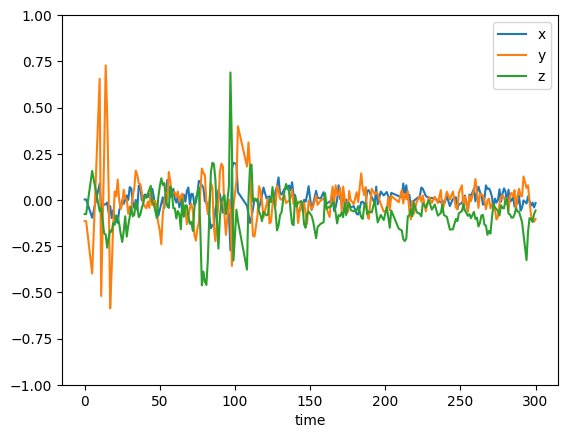

In [144]:
# set a threshold for the y axis
preprocess_data(not_pinched).plot(ylim=(-1, 1))
preprocess_data(pinched).plot(ylim=(-1, 1))
preprocess_data(to_pinched).plot(ylim=(-1, 1))